In [1]:
# Reference: https://www.machinecurve.com/index.php/2020/05/03/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn/
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
# load dataset
dataframe = pd.read_csv("G:\my drive\machine learning\Cholangiocarcinoma_ML\Data_Files\cc_cancer_mutations_post_LASSO_noheader.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
input = dataset[:,0:46].astype(float)
targets = dataset[:,46]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(targets)
encoded_targets = encoder.transform(targets)

     0   1   2   3   4   5   6   7   8   9   ...  37  38  39  40  41  42  43  \
0     1   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
374   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
375   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
376   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
377   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
378   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

     44  45  46  
0     0   1   0  
1  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(input, encoded_targets, test_size=0.33, random_state=42)

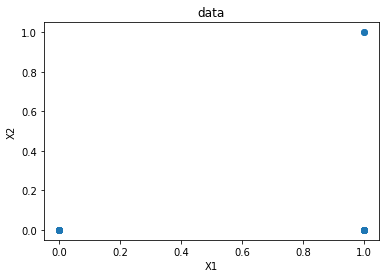

In [5]:
# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [6]:
from sklearn import svm
# Initialize SVM classifier
clf = svm.SVC(kernel='sigmoid')

In [7]:
clf = clf.fit(X_train, y_train)

In [8]:
predictions = clf.predict(X_test)


C:\Users\MattReidy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


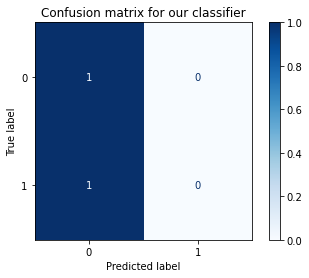

In [9]:
from sklearn.metrics import plot_confusion_matrix
# Predict the test set
predictions = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

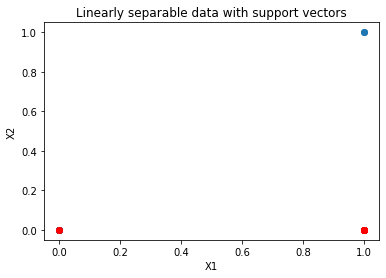

In [10]:
# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()